# Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
import sys
print (sys.executable)

/Users/lileo/Documents/projects/starbucks_ml/venv/bin/python3


In [3]:
X_1 = pd.read_csv('training_data/feature_group_1.csv', index_col='id')
X_2 = pd.read_csv('training_data/feature_group_2.csv', index_col='id')

y = pd.read_csv('training_data/target.csv', index_col='id')

In [4]:
common_index = set(X_1.index).intersection(set(y.index))
common_index = common_index.intersection(set(X_2.index))

## Extra Cleaning

In [5]:
for row in y.index:
    if row not in common_index:
        y.drop(row, axis=0, inplace=True)

for row in X_1.index:
    if row not in common_index:
        X_1.drop(row, axis=0, inplace=True)
        
for row in X_2.index:
    if row not in common_index:
        X_2.drop(row, axis=0, inplace=True)

In [6]:
for row in X_1.index:
    if X_1['gender'][row] == 'F':
        X_1.at[row, 'numeric_gender'] = 0
    else:
        X_1.at[row, 'numeric_gender'] = 1

X_1.drop('gender', axis=1, inplace=True)

In [7]:
X_1.head()

,age,became_member_on,income,numeric_gender
id,,,,
0610b486422d4921ae7d2bf64640c50b,55,20170715,112000.0,0.0
78afa995795e4d85b5d9ceeca43f5fef,75,20170509,100000.0,0.0
e2127556f4f64592b11af22de27a7932,68,20180426,70000.0,1.0
389bc3fa690240e798340f5a15918d5c,65,20180209,53000.0,1.0
2eeac8d8feae4a8cad5a6af0499a211d,58,20171111,51000.0,1.0


In [8]:
X_2.head()

,Avg Daily spending,Highest daily spending,Lowest daily spending,count days no spending,count days spending 0_to_5,count days spending 5_to_10,count days spending 10_to_15,count days spending 15_to_20,count days spending 20_plus,std_daily_spending
id,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,4.253333,28.16,8.57,22.0,0.0,1.0,1.0,1.0,2.0,7.867232
0011e0d4e6b944f998e987f904e8c1e5,2.648667,23.03,8.96,25.0,0.0,1.0,1.0,0.0,2.0,6.461309
0020c2b971eb4e9188eac86d93036a77,6.562000,49.63,17.24,24.0,0.0,0.0,0.0,1.0,5.0,14.444319
0020ccbbb6d84e358d3414a3ff76cffd,5.135000,30.84,6.81,19.0,0.0,3.0,3.0,2.0,1.0,7.923300
003d66b6608740288d6cc97a6903f4f0,1.611333,9.60,0.44,16.0,11.0,3.0,3.0,0.0,0.0,2.548575


In [9]:
y.head()

,ae264e3637204a6fb9bb56bc8210ddfd,4d5c57ea9a6940dd891ad53e9dbe8da0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,fafdcd668e3743c1bb461111dcafc2a4,f19421c1d4aa40978ebb69ca19b0e20d,2906b810c7d4411798c6938adc9daaa5
id,,,,,,,,
7366bef4c288476dab78b09a33d0e692,0,1,0,0,0,0,0,0
b912b714bf5e40609f6ff25a9a542a9c,0,0,0,0,0,1,0,0
46b3c686bbbd4495940b4da488e10ed6,1,1,0,0,1,0,0,0
a14d4f2ec359464f8d4aeac17b755903,1,0,0,0,1,1,0,0
f37d9566b54547d8bdc64cc949ddab90,0,0,0,0,1,0,0,0


## Modeling Feature Group 1

In [10]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(np.asarray(X_1), y, test_size=0.20, random_state=10)

In [11]:
y_test_1[:5]

,ae264e3637204a6fb9bb56bc8210ddfd,4d5c57ea9a6940dd891ad53e9dbe8da0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,fafdcd668e3743c1bb461111dcafc2a4,f19421c1d4aa40978ebb69ca19b0e20d,2906b810c7d4411798c6938adc9daaa5
id,,,,,,,,
a63cf729b0b44a12be0993e414676489,0,0,0,1,0,0,1,0
4b72995c52ab4cd5ab407924b09e1ab4,0,0,1,0,0,0,1,0
46bff6d3b8fb462880a0d476c3945c33,1,0,1,0,1,0,0,0
af69a507aefd4ecdbc4c33b0ec4dfe61,0,0,0,0,1,0,1,0
d0c81b8228754cc1abcf010c212d308e,0,0,0,0,0,1,0,0


score: 0.8065857885615252
score: 0.7909878682842287
score: 0.8506065857885615
score: 0.9133448873483535
score: 0.6911611785095321
score: 0.7043327556325824
score: 0.7358752166377817
score: 0.8481802426343155


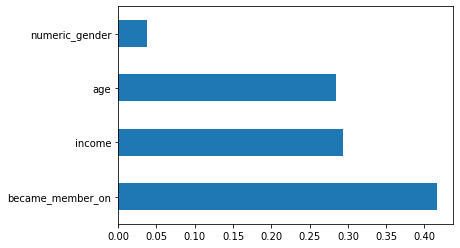

In [12]:
for coupon in y_train_1.columns:

    clf = RandomForestClassifier(n_estimators=100,
                                 random_state=11,
                                 min_samples_split=10,
                                 class_weight='balanced')
    clf.fit(X_train_1, y_train_1.loc[:][coupon])  

    feat_importances = pd.Series(clf.feature_importances_, index=X_1.columns)
    feat_importances.nlargest(14).plot(kind='barh')
    print('score:', clf.score(X_test_1, y_test_1.loc[:][coupon]))

## Modeling Feature Group 2

In [13]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(np.asarray(X_2), y, test_size=0.20, random_state=10)

score: 0.8166377816291162
score: 0.8031195840554592
score: 0.8623916811091854
score: 0.9161178509532062
score: 0.6960138648180243
score: 0.6890814558058925
score: 0.7417677642980935
score: 0.8512998266897747


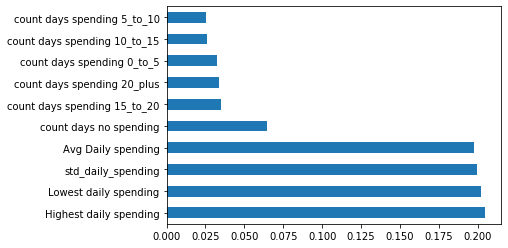

In [14]:
for coupon in y_train_2.columns:

    clf = RandomForestClassifier(n_estimators=100,
                                 random_state=11,
                                 min_samples_split=10, 
                                 class_weight='balanced')
    clf.fit(X_train_2, y_train_2.loc[:][coupon])  

    feat_importances = pd.Series(clf.feature_importances_, index=X_2.columns)
    feat_importances.nlargest(14).plot(kind='barh')
    print('score:', clf.score(X_test_2, y_test_2.loc[:][coupon]))

## Modeling Feature both Groups

In [15]:
X = pd.concat((X_1, X_2), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.20, random_state=10)

/Users/lileo/Documents/projects/starbucks_ml/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


score: 0.8374350086655112
score: 0.8239168110918544
score: 0.8745233968804159
score: 0.9202772963604853
score: 0.7383015597920277
score: 0.7393414211438475
score: 0.7750433275563259
score: 0.8682842287694974


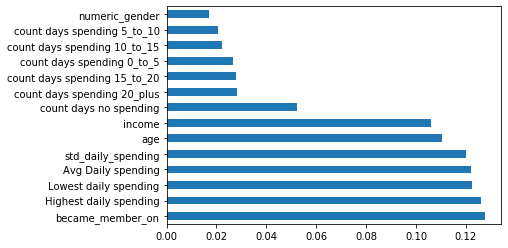

In [16]:
for coupon in y_train.columns:

    clf = RandomForestClassifier(n_estimators=100,
                                 random_state=11,
                                 min_samples_split=10, 
                                 class_weight='balanced')
    clf.fit(X_train, y_train.loc[:][coupon])  

    feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
    feat_importances.nlargest(14).plot(kind='barh')
    print('score:', clf.score(X_test, y_test.loc[:][coupon]))

## HyperOpts

In [17]:
from hyperopt import hp

space = hp.uniform('x', -5, 6)

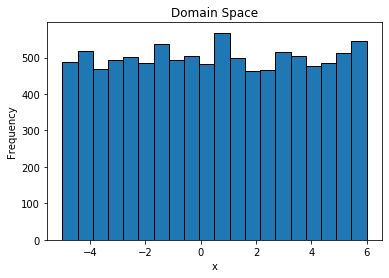

In [18]:
from hyperopt.pyll.stochastic import sample


samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))
    

# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');